# Customer Complaint Handling
https://pm4py.fit.fraunhofer.de/static/assets/api/2.5.0/getting_started.html#discovering-your-first-process-model

In [1]:
import pandas as pd
import pm4py
import datetime as dt

In [2]:
file_path = '../data/running-example.csv'

In [3]:
event_log = pd.read_csv(file_path, sep=';')
event_log.head()

,case_id,activity,timestamp,costs,resource
0,3,register request,2010-12-30 14:32:00+01:00,50,Pete
1,3,examine casually,2010-12-30 15:06:00+01:00,400,Mike
2,3,check ticket,2010-12-30 16:34:00+01:00,100,Ellen
3,3,decide,2011-01-06 09:18:00+01:00,200,Sara
4,3,reinitiate request,2011-01-06 12:18:00+01:00,200,Sara


In [4]:
num_events = len(event_log)
num_cases = len(event_log.case_id.unique())   
print("Number of events: {}\nNumber of cases: {}".format(num_events, num_cases))

Number of events: 42
Number of cases: 6


### Using pm4py

In [6]:
event_log = pm4py.format_dataframe(pd.read_csv(file_path, sep=';'), case_id='case_id',
    activity_key='activity', timestamp_key='timestamp')
start_activities = pm4py.get_start_activities(event_log)
end_activities = pm4py.get_end_activities(event_log)
print(f"Start actitivies: {start_activities}\nEnd activities: {end_activities}")

Start actitivies: {'register request': 6}
End activities: {'reject request': 3, 'pay compensation': 3}


/tmp/ipykernel_10128/1036995934.py:1: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  event_log = pm4py.format_dataframe(pd.read_csv(file_path, sep=';'), case_id='case_id',


In [7]:
filtered = pm4py.filter_time_range(event_log, dt.datetime(2010, 12, 30), dt.datetime(2010, 12, 31), mode='events')
filtered

,case_id,activity,timestamp,costs,resource,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,1,register request,2010-12-30 10:02:00+00:00,50,Pete,1,register request,2010-12-30 10:02:00+00:00,0,0
5,2,register request,2010-12-30 10:32:00+00:00,50,Mike,2,register request,2010-12-30 10:32:00+00:00,5,1
6,2,check ticket,2010-12-30 11:12:00+00:00,100,Mike,2,check ticket,2010-12-30 11:12:00+00:00,6,1
7,2,examine casually,2010-12-30 13:16:00+00:00,400,Sean,2,examine casually,2010-12-30 13:16:00+00:00,7,1
10,3,register request,2010-12-30 13:32:00+00:00,50,Pete,3,register request,2010-12-30 13:32:00+00:00,10,2
11,3,examine casually,2010-12-30 14:06:00+00:00,400,Mike,3,examine casually,2010-12-30 14:06:00+00:00,11,2
12,3,check ticket,2010-12-30 15:34:00+00:00,100,Ellen,3,check ticket,2010-12-30 15:34:00+00:00,12,2


There are 3 different types of process modelling notations: BPMN, Process Trees and Petri nets (more mathematical than BPMN)

### Business Process Model and Notation (BPMN)

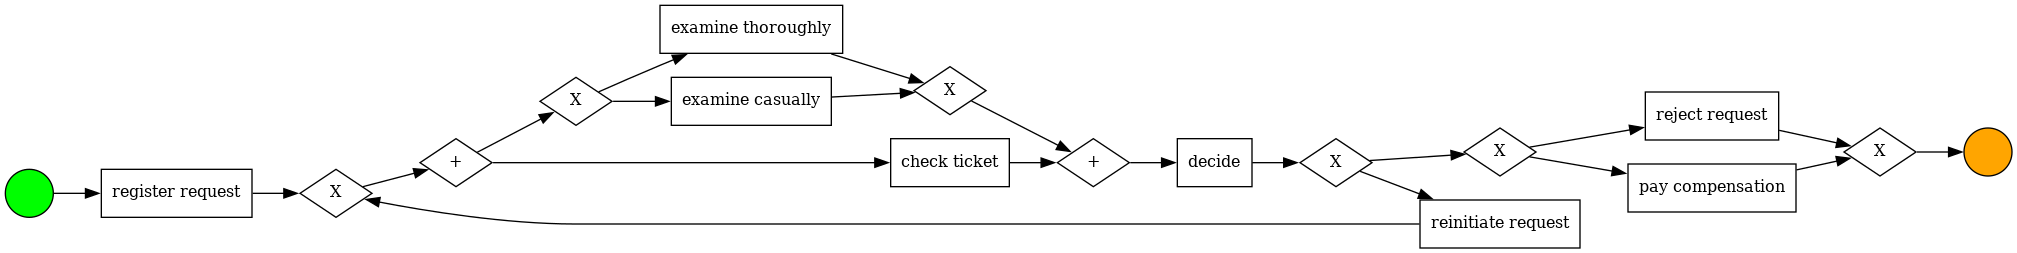

In [9]:
process_tree = pm4py.discover_process_tree_inductive(event_log)
bpmn_model = pm4py.convert_to_bpmn(process_tree)
pm4py.view_bpmn(bpmn_model)

Note: if error for graphviz, fix using `conda install python-graphviz`

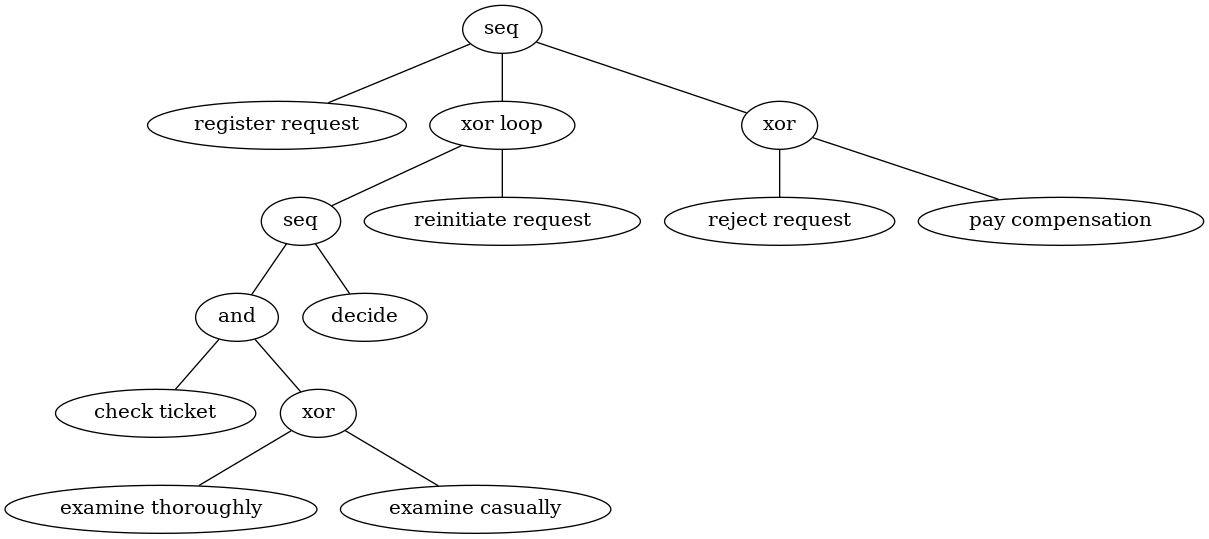

In [10]:
pm4py.view_process_tree(process_tree)